<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="cognitiveclass.ai logo">
</center>


# Machine Learning Foundation

## Course 4, Part c: Clustering Methods LAB


# Clustering Methods Exercises


## Introduction

This lab uses a dataset on wine quality. The data set contains various chemical properties of wine, such as acidity, sugar, pH, and alcohol. It also contains a quality metric (3-9, with highest being better) and a color (red or white). The name of the file is `Wine_Quality_Data.csv`.

We will be using the chemical properties (i.e. everything but quality and color) to cluster the wine. Though this is unsupervised learning, there are interesting semi-supervised extensions relating clustering results onto color and quality.


In [ ]:
# Define a custom warning function that does nothing (suppresses warnings)
# Parameters: *args (variable positional arguments), **kwargs (variable keyword arguments)
def warn(*args, **kwargs):
    pass

# Import the warnings module to control warning messages
import warnings
# Override the default warn function with our custom one to suppress all warnings
warnings.warn = warn

# Import seaborn for statistical data visualization
# Import pandas for data manipulation and analysis (aliased as pd)
# Import numpy for numerical operations (aliased as np)
import seaborn as sns, pandas as pd, numpy as np

In [ ]:
# Import numpy for numerical operations and array manipulation (aliased as np)
# Import pandas for data structures and data analysis (aliased as pd)
# Import matplotlib.pyplot for creating visualizations and plots (aliased as plt)
# Import seaborn for statistical data visualization built on matplotlib (aliased as sns)
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

## Question 1

*   Import the data and examine the features.
*   Note which are continuous, categorical, and boolean.
*   How many entries are there for the two colors and range of qualities?
*   Make a histogram plot of the quality for each of the wine colors.


In [ ]:
### BEGIN SOLUTION
# Load the Wine Quality dataset from the specified URL into a pandas DataFrame
# pd.read_csv() reads CSV (comma-separated values) file from the given URL
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/Wine_Quality_Data.csv")

# Display the first 4 rows of the dataset in transposed format (rows become columns)
# .head(n) returns the first n rows of the DataFrame
# .T transposes the DataFrame (swaps rows and columns for better readability)
data.head(4).T

In [ ]:
# Get the dimensions of the DataFrame (number of rows, number of columns)
# .shape returns a tuple: (number of rows, number of columns)
data.shape

The data types for each entry. The implementation of K-means in Scikit-learn is designed only to work with continuous data (even though it is sometimes used with categorical or boolean types). Fortunately, all the columns we will be using (everything except quality and color) are continuous.


In [ ]:
# Display the data type of each column in the DataFrame
# .dtypes returns a Series with column names as index and their data types as values
# This helps identify which columns are float64 (continuous), int64 (discrete), or object (categorical)
data.dtypes

The number of entries for each wine color.


In [ ]:
# Count the number of occurrences of each unique value in the 'color' column
# .value_counts() returns a Series with unique values as index and their counts as values
# This shows how many red and white wine samples are in the dataset
data.color.value_counts()

The distribution of quality values.


In [ ]:
# Count the number of occurrences of each quality rating and sort by quality value
# .value_counts() counts occurrences of each unique quality value
# .sort_index() sorts the results by the quality values (3-9) in ascending order
# This shows the distribution of wine quality ratings in the dataset
data.quality.value_counts().sort_index()

Now for the histogram.


In [ ]:
# Set seaborn plotting context to 'notebook' for appropriate figure sizes and fonts
sns.set_context('notebook')
# Set seaborn style to 'white' for clean background without gridlines
sns.set_style('white')

# Define custom colors from seaborn's default color palette
# Index [2] corresponds to a red-like color for red wine visualization
red = sns.color_palette()[2]
# Index [4] corresponds to a blue-like color for white wine visualization
white = sns.color_palette()[4]

# Create array of bin edges for the histogram ranging from 3 to 9 (quality values)
bin_range = np.array([3, 4, 5, 6, 7, 8, 9])

# Create a new matplotlib axes object for plotting
ax = plt.axes()
# Loop through each wine color ('red' and 'white') with their corresponding plot colors
for color, plot_color in zip(['red', 'white'], [red, white]):
    # Filter the data to get quality values for the current wine color
    # .loc[condition, column] selects rows where condition is True and returns specified column
    q_data = data.loc[data.color==color, 'quality']
    # Create histogram with specified parameters:
    # bins: array defining histogram bin edges
    # alpha: transparency level (0.5 = 50% transparent) for overlapping visualization
    # ax: the axes object to plot on
    # color: the color for this histogram
    # label: legend label for this histogram
    q_data.hist(bins=bin_range, 
                alpha=0.5, ax=ax, 
                color=plot_color, label=color)
    
# Add legend to the plot showing which color represents which wine type
ax.legend()
# Set axis labels: xlabel for x-axis, ylabel for y-axis
ax.set(xlabel='Quality', ylabel='Occurrence')

# Set x-axis limits from 3 to 10 to frame the data appropriately
ax.set_xlim(3,10)
# Set x-axis tick positions at bin_range + 0.5 to center ticks in each bin
ax.set_xticks(bin_range+0.5)
# Set x-axis tick labels to display the actual quality values (3-9)
ax.set_xticklabels(bin_range);
# Turn off the grid for cleaner visualization
ax.grid('off')
### END SOLUTION

## Question 2

*   Examine the correlation and skew of the relevant variables--everything except color and quality (without dropping these columns from our data).
*   Perform any appropriate feature transformations and/or scaling.
*   Examine the pairwise distribution of the variables with pairplots to verify scaling and normalization efforts.


In [ ]:
### BEGIN SOLUTION
# Create a list of column names that are float type (excluding 'color' and 'quality')
# This includes all continuous chemical property features
float_columns = [x for x in data.columns if x not in ['color', 'quality']]

# Calculate the correlation matrix for all float columns
# .corr() computes pairwise correlation of columns using Pearson correlation coefficient
# Values range from -1 (perfect negative correlation) to +1 (perfect positive correlation)
corr_mat = data[float_columns].corr()

# Remove diagonal values (self-correlation = 1.0) by setting them to 0.0
# This makes it easier to identify the strongest correlations between different features
for x in range(len(float_columns)):
    # .iloc[row, col] accesses DataFrame elements by integer position
    corr_mat.iloc[x,x] = 0.0
    
# Display the correlation matrix
corr_mat

In [ ]:
# Find the feature with the maximum absolute correlation for each feature
# .abs() takes absolute values to consider both positive and negative correlations
# .idxmax() returns the index (column name) with the maximum value for each row
# This shows which feature is most strongly correlated with each feature
corr_mat.abs().idxmax()

In [10]:
# Pairwise maximal correlations
corr_mat.abs().idxmax()

fixed_acidity                        density
volatile_acidity        total_sulfur_dioxide
citric_acid                 volatile_acidity
residual_sugar                       density
chlorides                          sulphates
free_sulfur_dioxide     total_sulfur_dioxide
total_sulfur_dioxide     free_sulfur_dioxide
density                              alcohol
pH                               citric_acid
sulphates                          chlorides
alcohol                              density
dtype: object

In [ ]:
# Apply log1p transformation to highly skewed columns to reduce skewness
# Loop through each column identified as highly skewed
for col in skew_columns.index.tolist():
    # np.log1p(x) computes log(1 + x), which handles zeros gracefully
    # This transformation reduces right-skewness by compressing large values
    data[col] = np.log1p(data[col])

### Log1p Transformation Formula

The log1p transformation is defined as:

$$y = \ln(1 + x)$$

Where:
- $x$ is the original feature value
- $\ln$ is the natural logarithm
- $y$ is the transformed value

**Why log1p instead of log?**
- Regular log transformation: $\ln(x)$ is undefined for $x = 0$
- log1p transformation: $\ln(1 + x)$ is defined for all $x \geq 0$
- This handles zero values gracefully without requiring offsets

**Purpose:**
- Reduces right-skewness in distributions
- Compresses large values while preserving relative differences
- Makes the distribution more symmetric and closer to normal
- Improves performance of algorithms that assume normally distributed features

In [ ]:
# Import StandardScaler for feature standardization from scikit-learn
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object that will standardize features
# Standardization transforms features to have mean=0 and standard deviation=1
sc = StandardScaler()

# Fit the scaler to the data and transform the float columns
# .fit_transform() computes mean and std, then applies the transformation
# This ensures all features are on the same scale for clustering algorithms
data[float_columns] = sc.fit_transform(data[float_columns])

# Display the first 4 rows to verify the transformation
# Values should now be centered around 0 with similar ranges
data.head(4)

### Standard Scaling (Z-score Normalization) Formula

The StandardScaler transformation is defined as:

$$z = \frac{x - \mu}{\sigma}$$

Where:
- $x$ is the original feature value
- $\mu$ is the mean of the feature across all samples
- $\sigma$ is the standard deviation of the feature
- $z$ is the standardized value (z-score)

**Properties after standardization:**
- Mean: $\mathbb{E}[z] = 0$
- Standard deviation: $\text{std}(z) = 1$

**Purpose:**
- Removes units and makes features comparable
- Prevents features with larger scales from dominating distance calculations
- Essential for clustering algorithms (K-Means, Hierarchical) that use distance metrics
- Improves convergence of optimization algorithms

In [ ]:
# Set seaborn plotting context to 'notebook' for appropriate sizing
sns.set_context('notebook')

# Create a pairwise plot (scatterplot matrix) of all float features plus color
# Parameters:
# - data[float_columns + ['color']]: DataFrame with features to plot plus color column
# - hue='color': color points by wine color (red/white)
# - hue_order=['white', 'red']: specify order of colors in legend
# - palette={'red':red, 'white':'gray'}: custom color mapping for visualization
# This plot shows relationships between all pairs of features and how they separate by wine color
sns.pairplot(data[float_columns + ['color']], 
             hue='color', 
             hue_order=['white', 'red'],
             palette={'red':red, 'white':'gray'});
### END SOLUTION

Perform feature scaling.


In [ ]:
# Import KMeans clustering algorithm from scikit-learn
from sklearn.cluster import KMeans
### BEGIN SOLUTION
# Create a KMeans clustering model with 2 clusters
# Parameters:
# - n_clusters=2: number of clusters to form
# - random_state=42: seed for random number generator (for reproducibility)
km = KMeans(n_clusters=2, random_state=42)

# Fit the K-Means model to the float feature data
# This finds the optimal cluster centers by minimizing within-cluster sum of squares
km = km.fit(data[float_columns])

# Predict cluster labels for all data points and add as new column 'kmeans'
# .predict() assigns each data point to the nearest cluster center
data['kmeans'] = km.predict(data[float_columns])

In [ ]:
# Analyze the K-Means clustering results by wine color
# Select columns 'color' and 'kmeans' from the data
(data[['color','kmeans']]
 # Group by both 'kmeans' cluster label and 'color'
 .groupby(['kmeans','color'])
 # Count the number of wines in each group
 .size()
 # Convert the Series result to a DataFrame
 .to_frame()
 # Rename the count column from 0 to 'number' for clarity
 .rename(columns={0:'number'}))
### END SOLUTION

Finally, the pairplot of the transformed and scaled features.


In [ ]:
### BEGIN SOLUTION
# Initialize an empty list to store results from each K-Means model
km_list = list()

# Loop through cluster values from 1 to 20 to test different numbers of clusters
for clust in range(1,21):
    # Create a K-Means model with 'clust' number of clusters
    # Parameters:
    # - n_clusters=clust: current number of clusters being tested
    # - random_state=42: ensures reproducible results
    km = KMeans(n_clusters=clust, random_state=42)
    # Fit the model to the float feature data
    km = km.fit(data[float_columns])
    
    # Store model information in a Series and append to list
    # clusters: number of clusters used
    # inertia: sum of squared distances of samples to their nearest cluster center
    # model: the fitted KMeans model object
    km_list.append(pd.Series({'clusters': clust, 
                              'inertia': km.inertia_,
                              'model': km}))

### Inertia and the Elbow Method

**Inertia (Within-Cluster Sum of Squares):**

$$\text{Inertia} = \sum_{j=1}^{k} \sum_{i \in C_j} ||x_i - \mu_j||^2$$

Where:
- $k$ is the number of clusters
- $C_j$ is the set of points in cluster $j$
- $x_i$ is a data point
- $\mu_j$ is the centroid of cluster $j$

**Elbow Method:**
The elbow method helps determine the optimal number of clusters by plotting inertia vs. number of clusters. 

- **How it works**: As $k$ increases, inertia decreases (more clusters = better fit)
- **The "elbow"**: The point where the rate of decrease sharply changes
- **Interpretation**: Beyond the elbow, adding more clusters provides diminishing returns
- **Goal**: Find the $k$ where the curve "bends" - balancing model complexity and fit

The optimal $k$ is typically at the elbow point where inertia reduction begins to plateau.

In [ ]:
# Import AgglomerativeClustering for hierarchical clustering from scikit-learn
from sklearn.cluster import AgglomerativeClustering
### BEGIN SOLUTION
# Create an Agglomerative Clustering model with specified parameters
# Parameters:
# - n_clusters=2: number of clusters to find
# - linkage='ward': uses Ward's minimum variance method for merging clusters
# - compute_full_tree=True: computes the full dendrogram tree for visualization
ag = AgglomerativeClustering(n_clusters=2, linkage='ward', compute_full_tree=True)

# Fit the agglomerative clustering model to the float feature data
ag = ag.fit(data[float_columns])

# Predict cluster labels and add as new column 'agglom'
# .fit_predict() fits the model and returns cluster labels in one step
data['agglom'] = ag.fit_predict(data[float_columns])

### Agglomerative Hierarchical Clustering with Ward Linkage

**Ward's Linkage Method:**

Ward's method minimizes the variance within clusters when merging. The distance between two clusters $C_a$ and $C_b$ is:

$$d(C_a, C_b) = \sqrt{\frac{2n_a n_b}{n_a + n_b}} ||\mu_a - \mu_b||_2$$

Where:
- $n_a, n_b$ are the number of points in clusters $C_a$ and $C_b$
- $\mu_a, \mu_b$ are the centroids of clusters $C_a$ and $C_b$
- $||\mu_a - \mu_b||_2$ is the Euclidean distance between centroids

**Ward's Criterion (Merge Cost):**

The increase in variance when merging clusters $C_a$ and $C_b$ is:

$$\Delta(C_a, C_b) = \sum_{i \in C_a \cup C_b} ||x_i - \mu_{ab}||^2 - \sum_{i \in C_a} ||x_i - \mu_a||^2 - \sum_{i \in C_b} ||x_i - \mu_b||^2$$

Where $\mu_{ab}$ is the centroid of the merged cluster.

**Algorithm:**
1. Start with each point as its own cluster
2. Repeatedly merge the two clusters that minimize the increase in total within-cluster variance
3. Stop when the desired number of clusters is reached

**Properties:**
- Tends to create compact, spherical clusters
- Minimizes within-cluster variance
- Sensitive to outliers

In [ ]:
# Analyze Agglomerative Clustering results by wine color
# Select 'color', 'agglom', and 'kmeans' columns
(data[['color','agglom','kmeans']]
 # Group by wine color and agglomerative cluster label
 .groupby(['color','agglom'])
 # Count the number of wines in each group
 .size()
 # Convert Series to DataFrame
 .to_frame()
 # Rename the count column from 0 to 'number'
 .rename(columns={0:'number'}))

In [ ]:
# Compare both clustering methods side-by-side
# Select 'color', 'agglom', and 'kmeans' columns
(data[['color','agglom','kmeans']]
 # Group by all three columns to see the overlap between clustering methods
 .groupby(['color','agglom','kmeans'])
 # Count the number of wines in each combination
 .size()
 # Convert Series to DataFrame
 .to_frame()
 # Rename the count column from 0 to 'number'
 # This shows how many wines have each combination of color, agglom cluster, and kmeans cluster
 .rename(columns={0:'number'}))

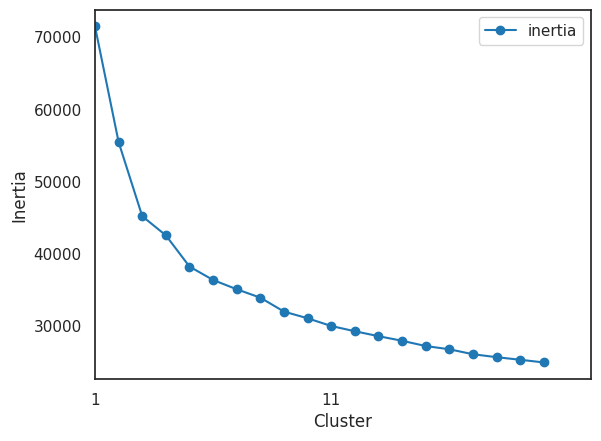

In [18]:
plot_data = (pd.concat(km_list, axis=1)
             .T
             [['clusters','inertia']]
             .set_index('clusters'))

ax = plot_data.plot(marker='o',ls='-')
ax.set_xticks(range(0,21,2))
ax.set_xlim(0,21)
ax.set(xlabel='Cluster', ylabel='Inertia');
### END SOLUTION

In [19]:
from sklearn.cluster import AgglomerativeClustering
### BEGIN SOLUTION
ag = AgglomerativeClustering(n_clusters=2, linkage='ward', compute_full_tree=True)
ag = ag.fit(data[float_columns])
data['agglom'] = ag.fit_predict(data[float_columns])

### ROC-AUC Score (Area Under the ROC Curve)

**ROC Curve:**
The Receiver Operating Characteristic (ROC) curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various classification thresholds.

$$\text{TPR (Sensitivity/Recall)} = \frac{TP}{TP + FN}$$

$$\text{FPR} = \frac{FP}{FP + TN}$$

Where:
- $TP$ = True Positives (correctly predicted positive class)
- $FN$ = False Negatives (incorrectly predicted negative class)
- $FP$ = False Positives (incorrectly predicted positive class)
- $TN$ = True Negatives (correctly predicted negative class)

**AUC (Area Under the Curve):**

$$\text{AUC} = \int_0^1 \text{TPR}(t) \, d(\text{FPR}(t))$$

Where $t$ represents the classification threshold.

**Interpretation:**
- AUC = 1.0: Perfect classifier
- AUC = 0.5: Random classifier (no discrimination ability)
- AUC < 0.5: Worse than random
- 0.7 ≤ AUC < 0.8: Acceptable
- 0.8 ≤ AUC < 0.9: Excellent
- AUC ≥ 0.9: Outstanding

**Why ROC-AUC?**
- Threshold-independent metric
- Robust to class imbalance
- Measures the model's ability to distinguish between classes

In [ ]:
# Import LogisticRegression classifier from scikit-learn
from sklearn.linear_model import LogisticRegression

# Create basis feature set using only the float columns (chemical properties)
X_basis = data[float_columns]

# Reuse the StratifiedShuffleSplit cross-validator with 10 splits
sss = StratifiedShuffleSplit(n_splits=10, random_state=6532)

# Define function to create feature set with one-hot encoded K-Means clusters
# Parameter:
# - n: number of clusters to create
def create_kmeans_columns(n):
    # Create K-Means model with n clusters
    km = KMeans(n_clusters=n)
    # Fit the model to the basis features
    km.fit(X_basis)
    # Predict cluster labels for all data points
    km_col = pd.Series(km.predict(X_basis))
    # One-hot encode the cluster labels
    # pd.get_dummies() creates binary columns for each cluster (0 or 1)
    # prefix='kmeans_cluster': adds prefix to column names (e.g., kmeans_cluster_0, kmeans_cluster_1)
    km_cols = pd.get_dummies(km_col, prefix='kmeans_cluster')
    # Concatenate the original features with the one-hot encoded cluster features
    # axis=1: concatenate along columns
    return pd.concat([X_basis, km_cols], axis=1)

# Create LogisticRegression estimator with default parameters
estimator = LogisticRegression()

# Create range of cluster numbers to test (1 to 20)
ns = range(1, 21)

# For each number of clusters, create features and calculate average ROC-AUC
# List comprehension: iterates through each n, creates features, and evaluates model
roc_auc_list = [get_avg_roc_10splits(estimator, create_kmeans_columns(n), y)
                for n in ns]

# Create a new axes object for plotting
ax = plt.axes()
# Plot the ROC-AUC scores vs. number of clusters
ax.plot(ns, roc_auc_list)
# Set plot properties
ax.set(
    # Set x-axis tick labels to cluster numbers (1-20)
    xticklabels= ns,
    # Set x-axis label
    xlabel='Number of clusters as features',
    # Set y-axis label
    ylabel='Average ROC-AUC over 10 iterations',
    # Set plot title
    title='KMeans + LogisticRegression'
)
# Enable grid for better readability
ax.grid(True)
### END SOLUTION

### Logistic Regression

**Logistic Function (Sigmoid):**

The logistic regression model uses the sigmoid function to map linear combinations to probabilities:

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

**Probability Prediction:**

$$P(y=1|x) = \sigma(w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$$

Where:
- $x$ is the feature vector
- $w$ is the weight vector
- $b$ is the bias term
- $P(y=1|x)$ is the probability that the sample belongs to class 1

**Log-Loss (Cross-Entropy Loss):**

The optimization objective minimizes the negative log-likelihood:

$$J(w,b) = -\frac{1}{m}\sum_{i=1}^{m}\left[y_i \log(\hat{y}_i) + (1-y_i)\log(1-\hat{y}_i)\right]$$

Where:
- $m$ is the number of samples
- $y_i$ is the true label (0 or 1)
- $\hat{y}_i = P(y_i=1|x_i)$ is the predicted probability

**One-Hot Encoding:**

For a categorical variable with $k$ categories, one-hot encoding creates $k$ binary features:

$$\text{Category } j \rightarrow [0, 0, \ldots, 1, \ldots, 0]$$

where only the $j$-th position is 1, rest are 0.

**Purpose in this context:**
- Converting K-Means cluster assignments (categorical) to binary features
- Allows linear models to capture cluster membership information

In [21]:
# Comparing with KMeans results:
(data[['color','agglom','kmeans']]
 .groupby(['color','kmeans'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
color kmeans        
red   0         1576
      1           23
white 0           87
      1         4811

In [22]:
# Comparing results:
(data[['color','agglom','kmeans']]
 .groupby(['color','agglom','kmeans'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
color agglom kmeans        
red   0      0           13
             1           18
      1      0         1563
             1            5
white 0      0           38
             1         4717
      1      0           49
             1           94

Though the cluster numbers are not identical, the clusters are very consistent within a single wine variety (red or white).

And here is a plot of the dendrogram created from agglomerative clustering.


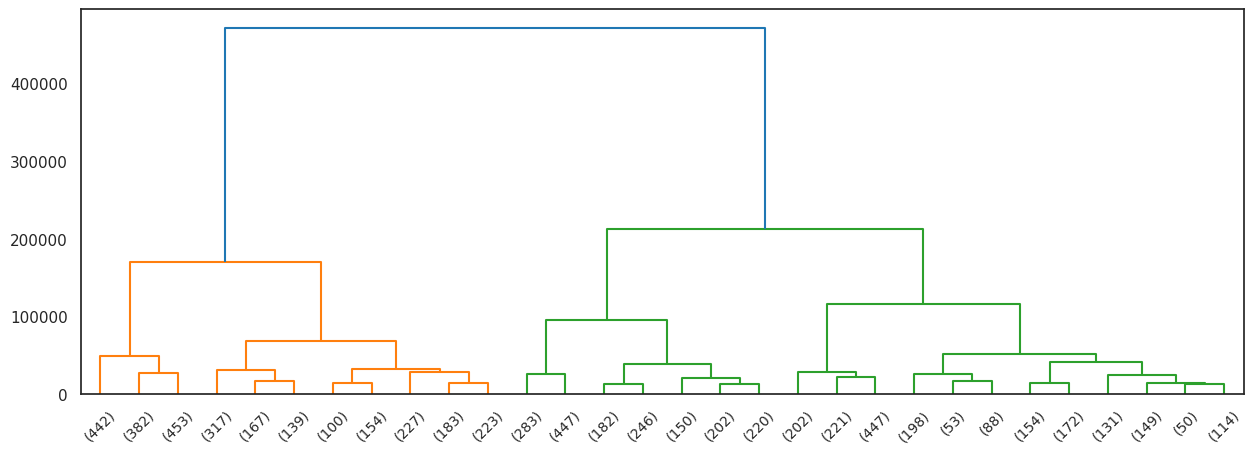

In [23]:
# First, we import the cluster hierarchy module from SciPy (described above) to obtain the linkage and dendrogram functions.
from scipy.cluster import hierarchy

Z = hierarchy.linkage(ag.children_, method='ward')

fig, ax = plt.subplots(figsize=(15,5))


den = hierarchy.dendrogram(Z, orientation='top', 
                           p=30, truncate_mode='lastp',
                           show_leaf_counts=True, ax=ax)
### END SOLUTION

## Question 6

In this question, we are going to explore clustering as a form of feature engineering.

*   Create a **binary** target variable `y`, denoting if the quality is greater than 7 or not.
*   Create a variable called `X_with_kmeans` from `data`, by dropping the columns "quality", "color" and "agglom" from the dataset. Create `X_without_kmeans` from that by dropping "kmeans".
*   For both datasets, using **[StratifiedShuffleSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01)** with 10 splits, fit 10 Random Forest Classifiers and find the mean of the ROC-AUC scores from these 10 classifiers.
*   Compare the average roc-auc scores for both models, the one using the KMeans cluster as a feature and the one that doesn't use it.


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import StratifiedShuffleSplit

### BEGIN SOLUTION
y = (data['quality'] > 7).astype(int)
X_with_kmeans = data.drop(['agglom', 'color', 'quality'], axis=1)
X_without_kmeans = X_with_kmeans.drop('kmeans', axis=1)
sss = StratifiedShuffleSplit(n_splits=10, random_state=6532)

def get_avg_roc_10splits(estimator, X, y):
    roc_auc_list = []
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        estimator.fit(X_train, y_train)
        y_predicted = estimator.predict(X_test)
        y_scored = estimator.predict_proba(X_test)[:, 1]
        roc_auc_list.append(roc_auc_score(y_test, y_scored))
    return np.mean(roc_auc_list)
# return classification_report(y_test, y_predicted)

estimator = RandomForestClassifier()
roc_with_kmeans = get_avg_roc_10splits(estimator, X_with_kmeans, y)
roc_without_kmeans = get_avg_roc_10splits(estimator, X_without_kmeans, y)
print("Without kmeans cluster as input to Random Forest, roc-auc is \"{0}\"".format(roc_without_kmeans))
print("Using kmeans cluster as input to Random Forest, roc-auc is \"{0}\"".format(roc_with_kmeans))

Without kmeans cluster as input to Random Forest, roc-auc is "0.9101904761904761"
Using kmeans cluster as input to Random Forest, roc-auc is "0.9132579365079364"


Let's now explore if the number of clusters have an effect in this improvement.

*   Create the basis training set from `data` by restricting to float_columns.
*   For $n = 1, \ldots, 20$, fit a KMeans algorithim with $n$ clusters. **[One-hot encode]()** it and add it to the **basis** training set. Don't add it to the previous iteration.
*   Fit 10 **Logistic Regression** models and compute the average roc-auc-score.
*   Plot the average roc-auc scores.


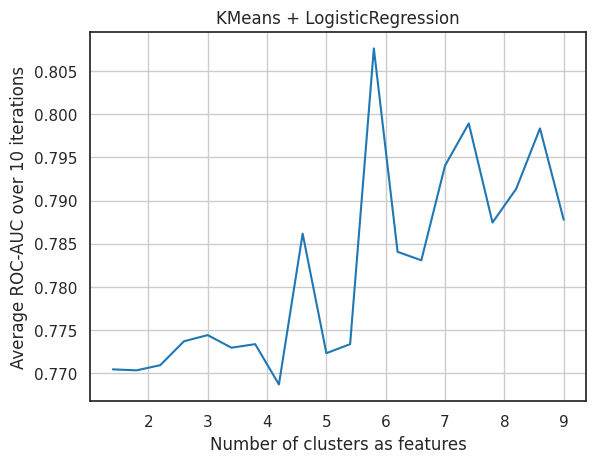

In [25]:
from sklearn.linear_model import LogisticRegression

X_basis = data[float_columns]
sss = StratifiedShuffleSplit(n_splits=10, random_state=6532)

def create_kmeans_columns(n):
    km = KMeans(n_clusters=n)
    km.fit(X_basis)
    km_col = pd.Series(km.predict(X_basis))
    km_cols = pd.get_dummies(km_col, prefix='kmeans_cluster')
    return pd.concat([X_basis, km_cols], axis=1)

estimator = LogisticRegression()
ns = range(1, 21)
roc_auc_list = [get_avg_roc_10splits(estimator, create_kmeans_columns(n), y)
                for n in ns]

ax = plt.axes()
ax.plot(ns, roc_auc_list)
ax.set(
    xticklabels= ns,
    xlabel='Number of clusters as features',
    ylabel='Average ROC-AUC over 10 iterations',
    title='KMeans + LogisticRegression'
)
ax.grid(True)
### END SOLUTION

***

### Machine Learning Foundation (C) 2020 IBM Corporation
